In [1]:
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import scanpy as sc
import scvi

from datetime import date
today = str(date.today())

import matplotlib
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
sc.settings.set_figure_params(dpi = 150, color_map = 'RdPu', dpi_save = 600, vector_friendly = True, format = 'pdf')

In [2]:
cd D:\chai_WJH\Neomycin_Project\R\new_p21

D:\chai_WJH\Neomycin_Project\R\new_p21


In [3]:
adata_p21 = sc.read("P21_ITG_raw_scanvi_SCANPY.h5ad")

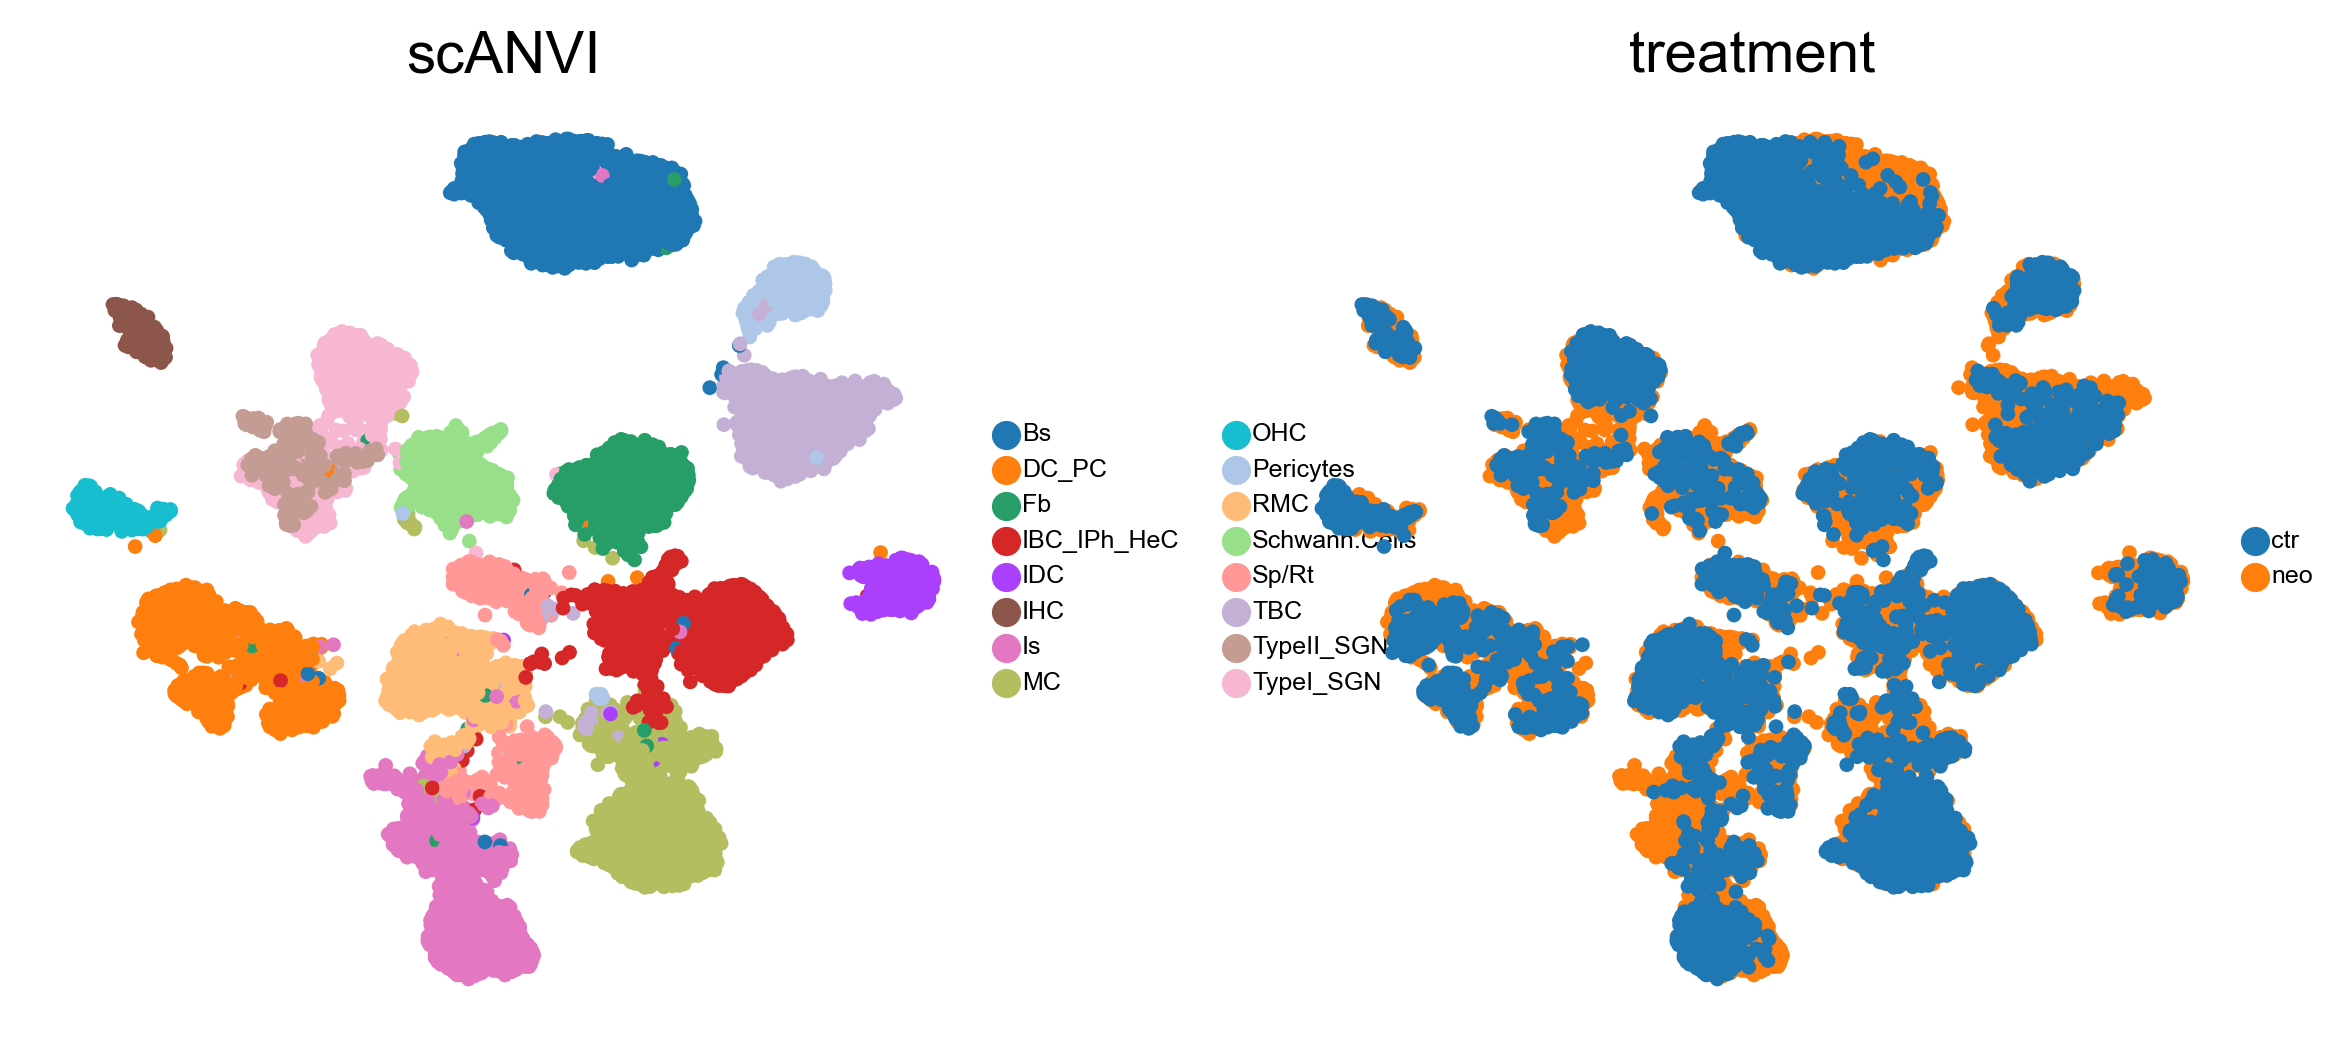

In [4]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.umap(adata_p21, color=['cell_type2','treatment'], wspace=0.2,
           size=50,
           legend_fontsize=6,ncols =2,title='scANVI'
          )

In [5]:
adata=adata_p21.copy()
adata

AnnData object with n_obs × n_vars = 26265 × 32285
    obs: 'CellID', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster2', 'cell_type2', 'treatment', 'cluster', 'cluster5'
    var: 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster5', 'cluster5_colors', 'log1p', 'neighbors', 'umap', 'treatment_colors'
    obsm: 'X_pca', 'X_scANVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [7]:
neo_Pyroptosis = pd.read_csv("neo_p21_Pyroptosis.csv" )

In [8]:
neo_Pyroptosis = neo_Pyroptosis["Gene"]

In [9]:
neo_Apoptosis = pd.read_csv("neo_p21_Apoptosis.csv" )

In [10]:
neo_Apoptosis = neo_Apoptosis["Gene"]

In [11]:
neo_Necroptosis = pd.read_csv("neo_p21_Necroptosis.csv" )

In [12]:
neo_Necroptosis = neo_Necroptosis["Gene"]

In [15]:
adata_SV = adata[adata.obs['cell_type2'].isin(['Is','Bs','MC'])]
adata_SV

View of AnnData object with n_obs × n_vars = 11055 × 32285
    obs: 'CellID', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster2', 'cell_type2', 'treatment', 'cluster', 'cluster5'
    var: 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster5', 'cluster5_colors', 'log1p', 'neighbors', 'umap', 'treatment_colors'
    obsm: 'X_pca', 'X_scANVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [13]:
sc.tl.rank_genes_groups(adata_p21, 'cell_type2',method='t-test',corr_method='benjamini-hochberg')

In [15]:
pd.DataFrame(adata_p21.uns['rank_genes_groups']['names'])

,Bs,DC_PC,Fb,IBC_IPh_HeC,IDC,IHC,Is,MC,OHC,Pericytes,RMC,Schwann.Cells,Sp/Rt,TBC,TypeII_SGN,TypeI_SGN
0,Rnf152,6330411D24Rik,Coch,Prss36,Pde4b,Ptprq,Dct,Kcnq1,Ankfn1,Cntn4,Gm29266,Ctnna3,Dclk1,Prkg1,Rbfox1,Snap25
1,Kirrel3,Dpf3,Slc8a3,Srgap1,Srgap1,Otof,Tyr,Cacnb2,Dnm3,Tenm2,Sulf1,Mpz,Camk2d,Nav2,Meg3,Map1b
2,Ablim3,C530008M17Rik,Ahcyl2,Tmod1,Ceacam16,Pcsk5,Nrcam,Slit3,Loxhd1,Trpm3,Plxdc2,Sorcs1,Plxdc2,Kcnb2,Fgf12,Calb2
3,Gm12153,Rorb,Sorcs3,BC006965,Tmod1,Kcnh8,Dlc1,Lrp2,Slc26a5,Pid1,Stim2,Mbp,Pde4b,Grid2,Snhg11,Atp1a3
4,Neat1,Otog,Col25a1,Epyc,Plxdc2,Myo3a,Taf1d,Esrrb,Galnt13,Rgs6,Grid2,Sema5a,Gas2,Phactr1,Spock3,Adam23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32280,Gramd1b,Phldb2,Gm13963,Ccbe1,Gm43948,Zbtb20,Gna14,Aff3,Nrg3os,Gm10863,Ebf1,Synj2,Mllt3,Sh3tc2,Gm28809,Sobp
32281,Tmod1,Fmnl2,Gm42609,Zeb1,Gm10115,Mfsd2a,Eya4,Maml2,Mbnl2,Rab17,St6gal1,2210408F21Rik,Eya1,Sox10,Gm16036,Mir100hg
32282,Srgap3,Malat1,Fam83f,Zeb2,Dzip1l,Gm42418,Tshz2,Chst11,Gm4793,Grhl2,Arhgap31,Mtss1,Osbpl6,Sox5,Gm49226,2610035D17Rik
32283,Farp1,Rbms3,Gm10863,Zbtb16,Gm28175,Scn9a,Sorbs2,Prkca,Fam171b,Kank1,Aff3,Gna14,Chst11,2610035D17Rik,Gm45025,Tcf7l2


In [17]:
adata=adata_p21.copy()
adata

AnnData object with n_obs × n_vars = 26265 × 32285
    obs: 'CellID', 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cluster2', 'cell_type2', 'treatment', 'cluster', 'cluster5'
    var: 'Gene', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'batch_colors', 'cell_type2_colors', 'cluster5', 'cluster5_colors', 'log1p', 'neighbors', 'umap', 'treatment_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_scANVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [20]:
result = adata.uns['rank_genes_groups']

In [21]:
group_labels = result['names'].dtype.names  # 获取所有的细胞类型标签
all_genes = pd.DataFrame()

for group in group_labels:
    group_data = pd.DataFrame({
        'gene': result['names'][group],
        'logfoldchanges': result['logfoldchanges'][group],
        'pvals': result['pvals'][group],
        'pvals_adj': result['pvals_adj'][group]
    })
    group_data['cell_type'] = group
    all_genes = pd.concat([all_genes, group_data], axis=0)


In [22]:
all_genes.set_index('gene', inplace=True)

In [25]:
filtered_genes = all_genes[all_genes['pvals'] < 0.001]

In [26]:
filtered_genes.to_excel('P21_celltype2_DEG.xlsx')

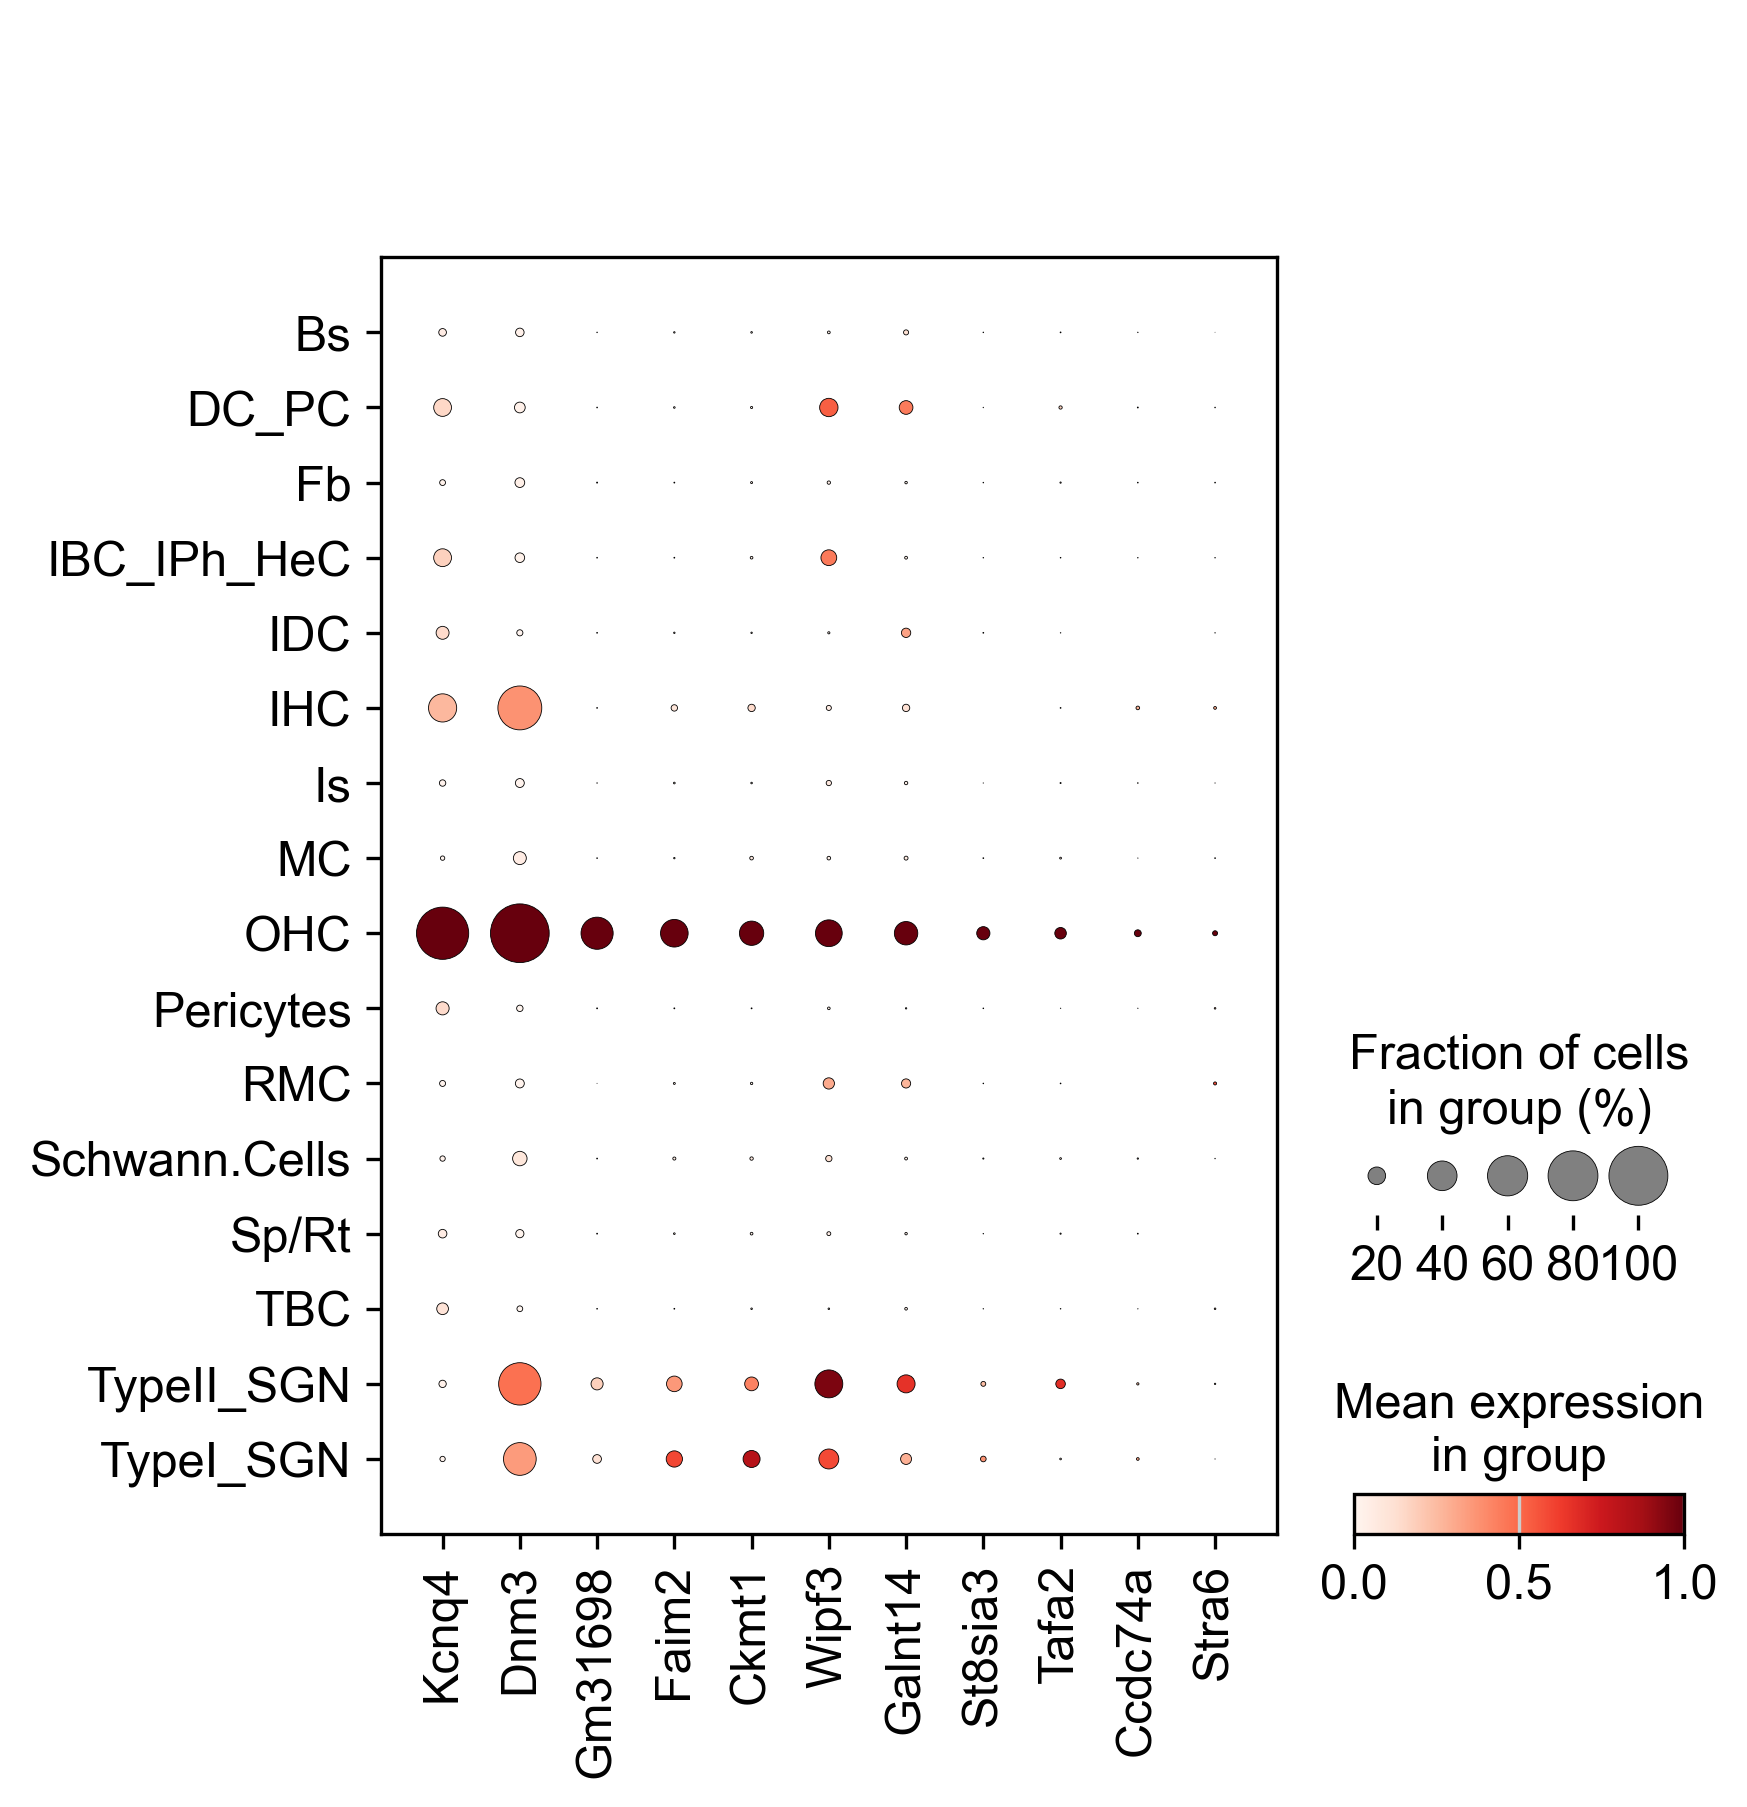

In [32]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.dotplot(
    adata_p21,
    groupby="cell_type2",
    var_names=["Kcnq4","Dnm3","Gm31698","Faim2","Ckmt1","Wipf3","Galnt14","St8sia3","Tafa2","Ccdc74a","Stra6"],
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

In [29]:
adata_p21_ctr = adata_p21[adata_p21.obs['treatment']=='ctr']

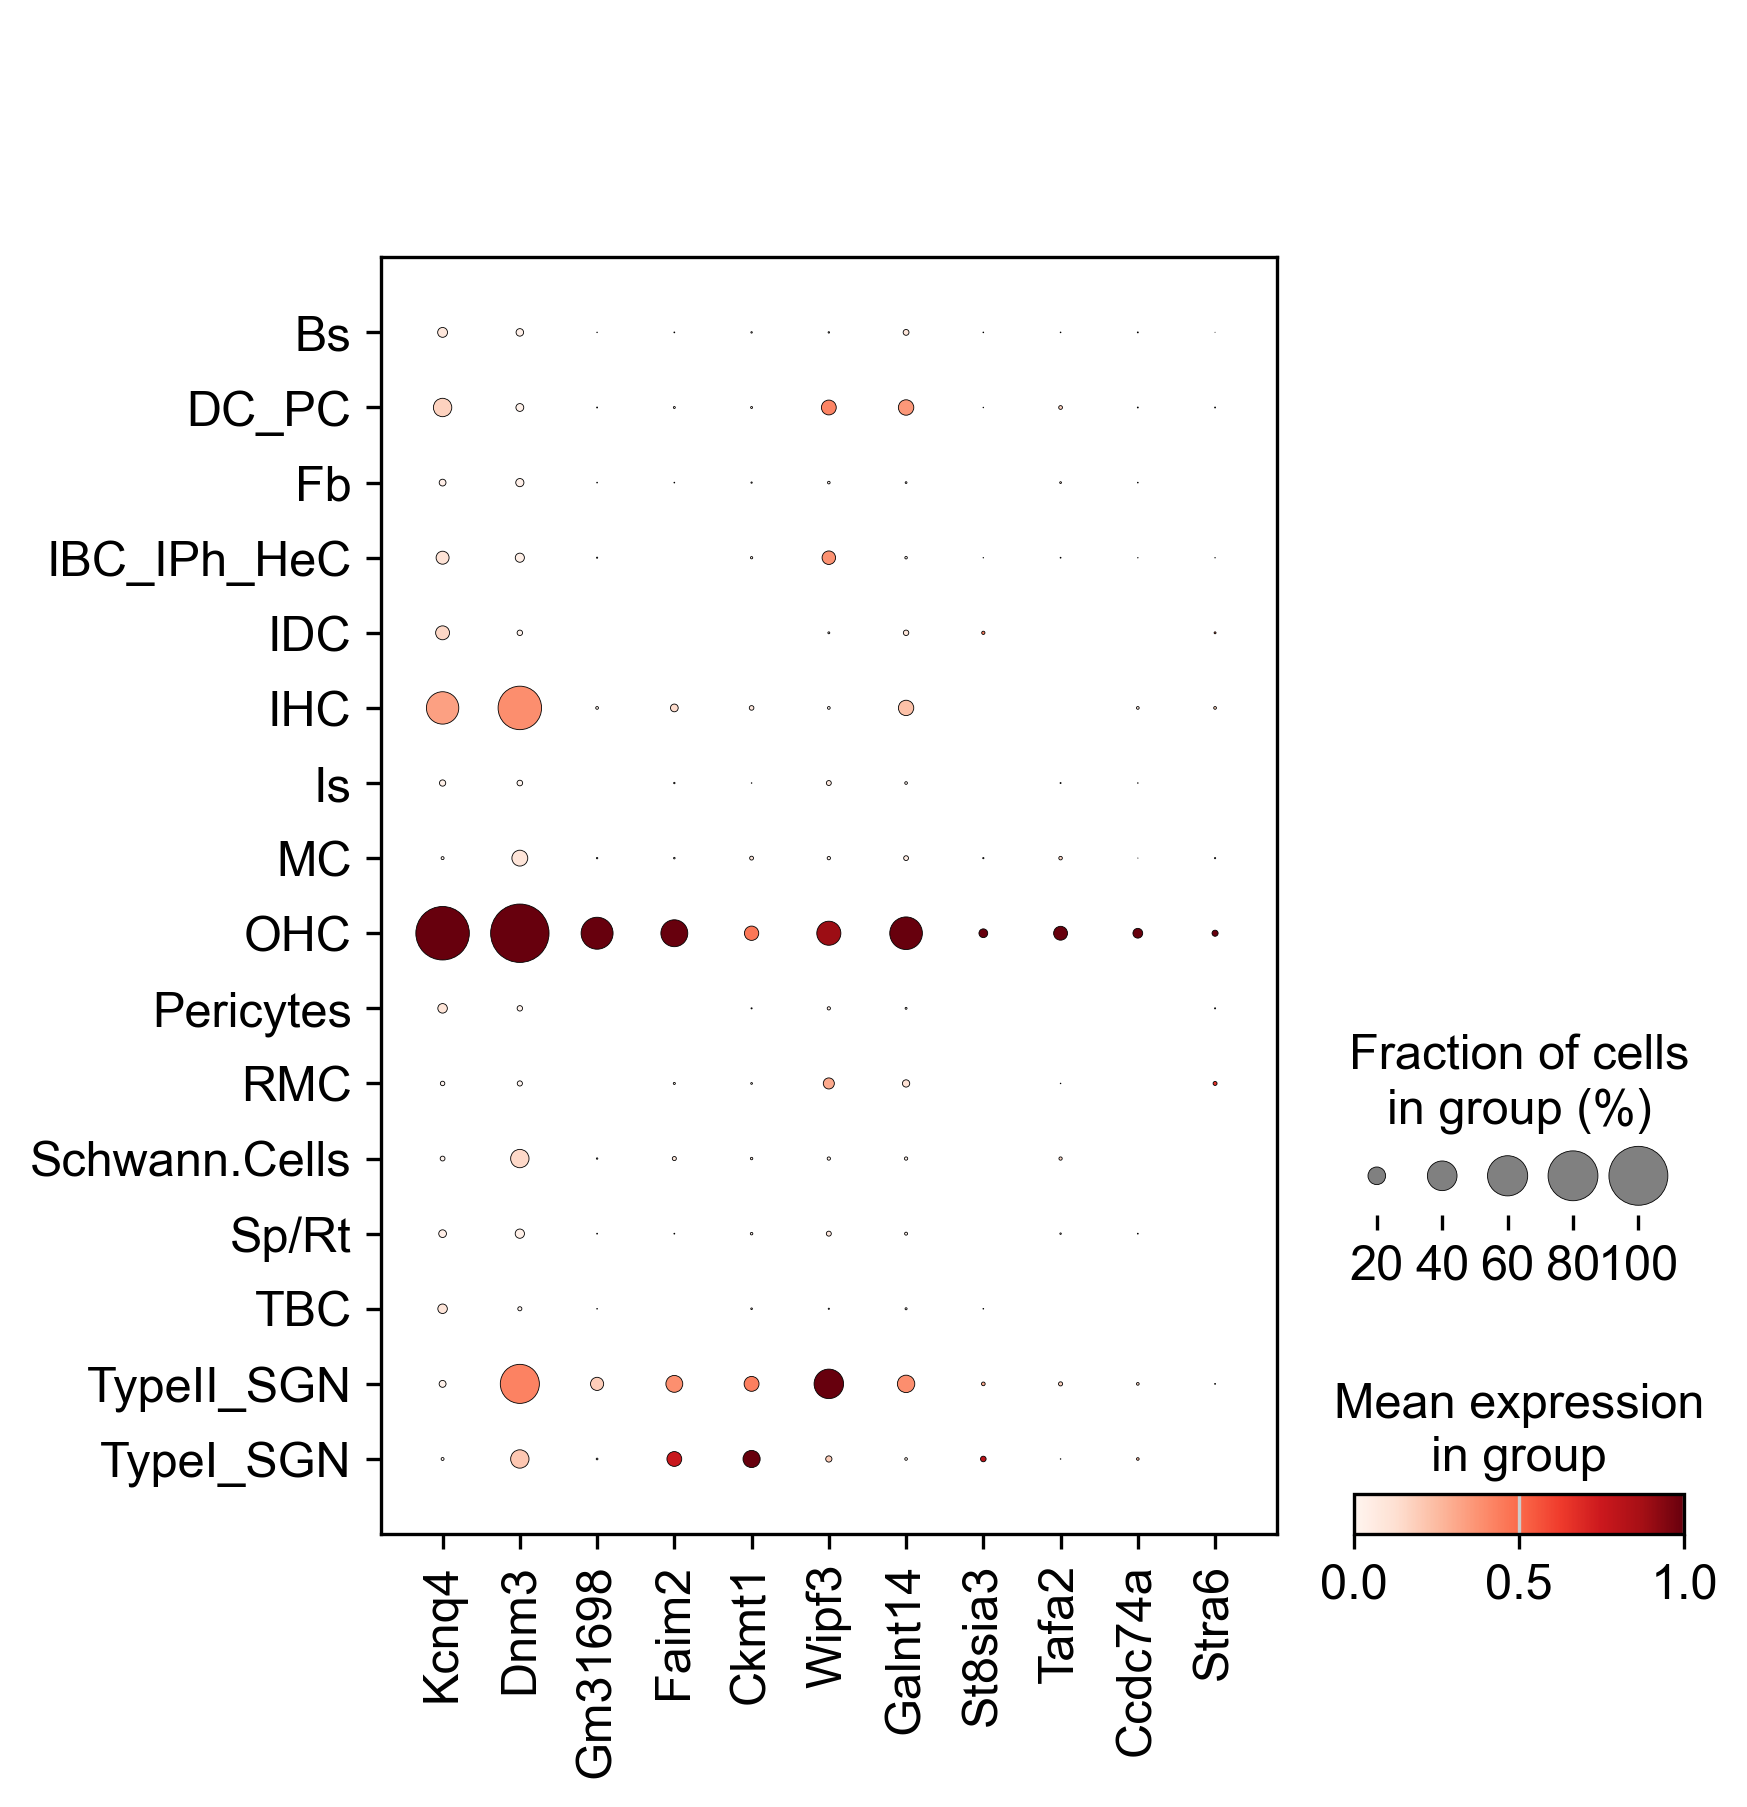

In [31]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.dotplot(
    adata_p21_ctr,
    groupby="cell_type2",
    var_names=["Kcnq4","Dnm3","Gm31698","Faim2","Ckmt1","Wipf3","Galnt14","St8sia3","Tafa2","Ccdc74a","Stra6"],
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

In [33]:
adata_p21.obs['combined_group'] = adata_p21.obs['cell_type2'].astype(str) + "_" + adata.obs['treatment'].astype(str)

In [34]:
print(adata_p21.obs['combined_group'])

neo1-AAACCCAAGTAGCATA-1-0         Sp/Rt_neo
neo1-AAACCCACAAGACCTT-1-0           TBC_neo
neo1-AAACCCACATACTGTG-1-0            Is_neo
neo1-AAACCCACATGACGTT-1-0            Bs_neo
neo1-AAACCCATCCCGTTGT-1-0           OHC_neo
                                  ...      
ctr2-TTTGGTTGTCCTACGG-1-1    TypeII_SGN_ctr
ctr2-TTTGTTGAGAGAGAAC-1-1            Is_ctr
ctr2-TTTGTTGAGCCACCGT-1-1    TypeII_SGN_ctr
ctr2-TTTGTTGGTGATGAAT-1-1            Bs_ctr
ctr2-TTTGTTGTCATCCTAT-1-1            Is_ctr
Name: combined_group, Length: 26265, dtype: object


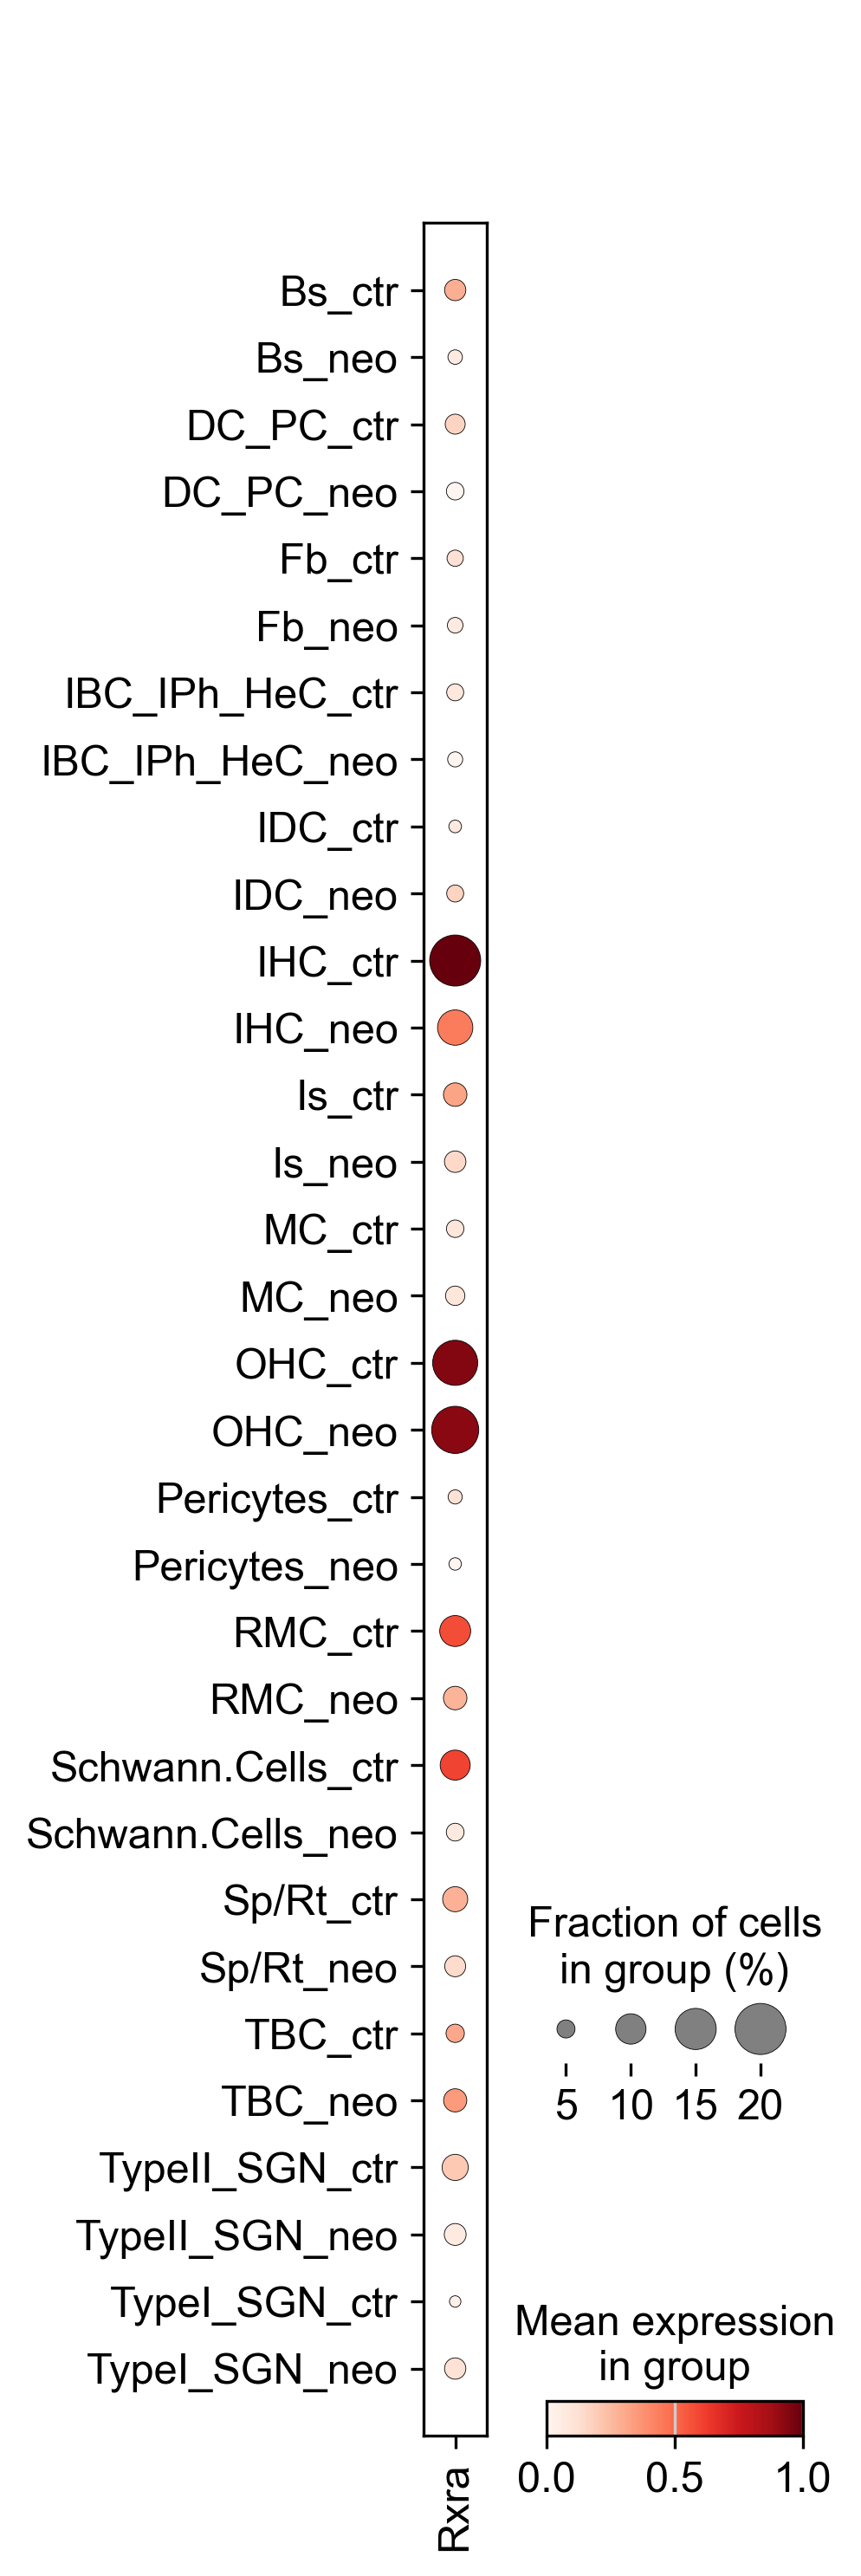

In [36]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.dotplot(
    adata_p21,
    groupby="combined_group",
    var_names="Rxra",
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

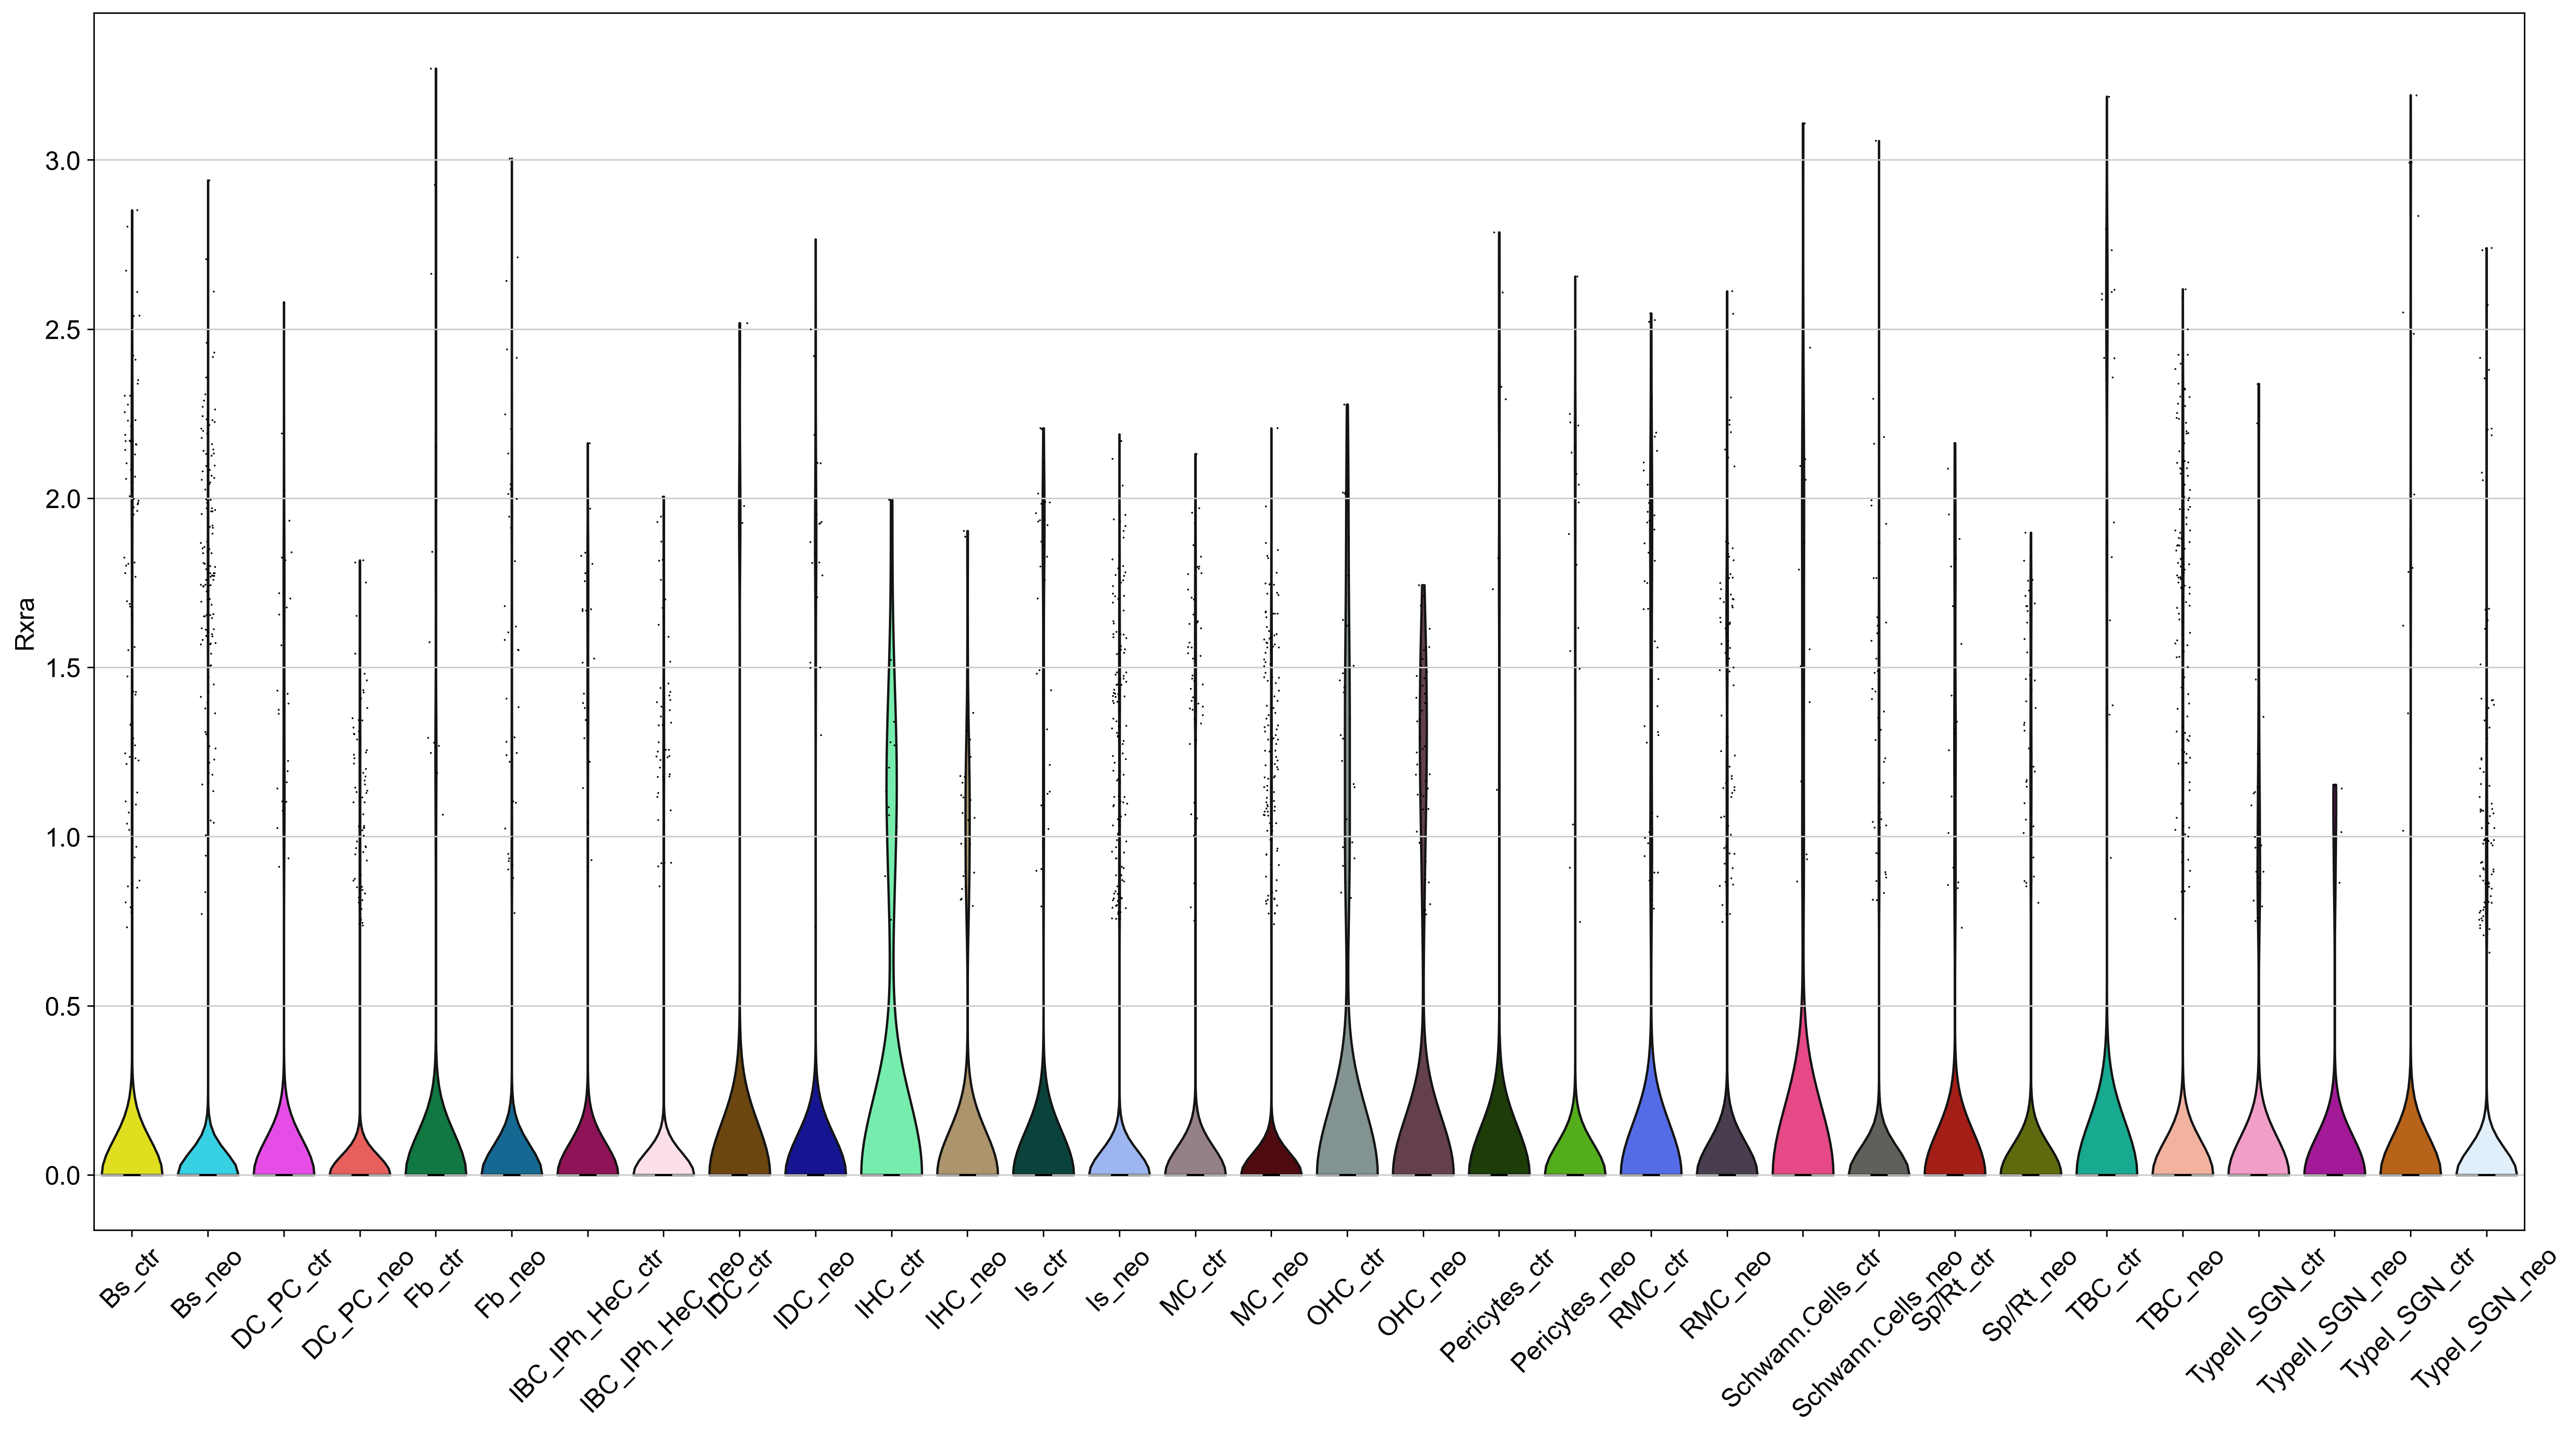

In [37]:
sc.set_figure_params(figsize=(18,12),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata_p21,['Rxra'],groupby='combined_group',
             jitter=True,rotation=45
           )# 

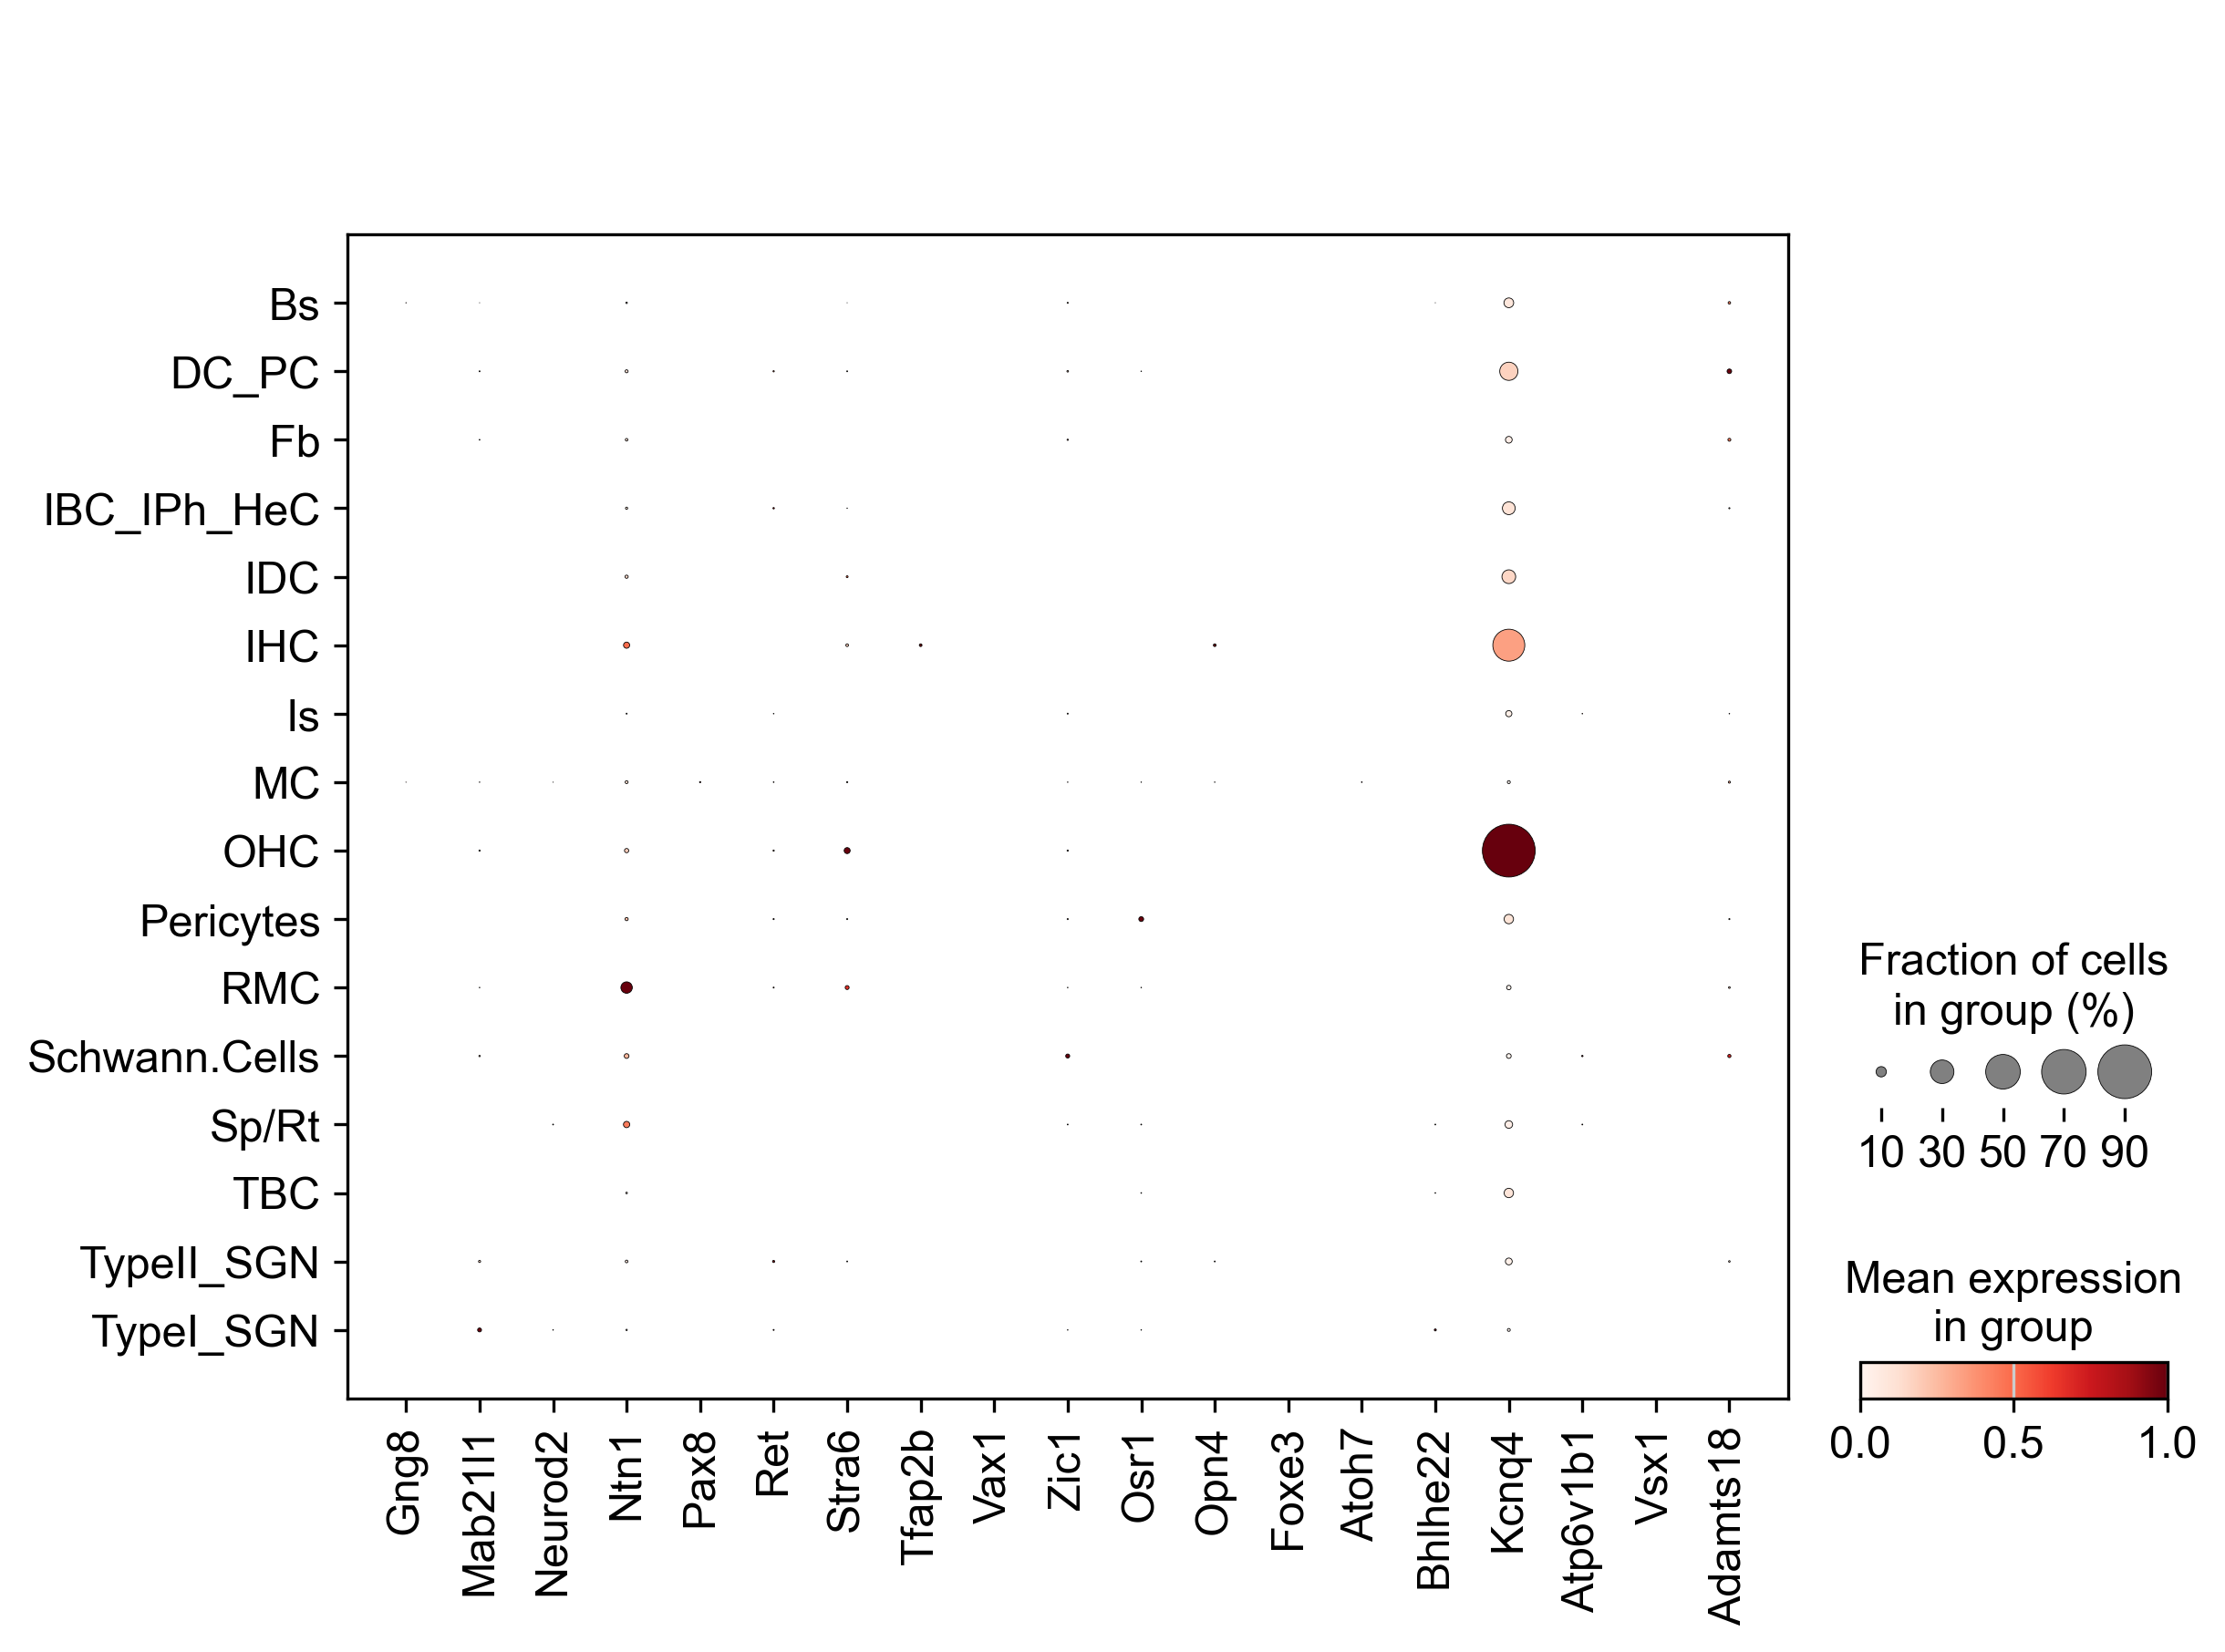

In [39]:
sc.set_figure_params(figsize=(4,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.dotplot(
    adata_p21_ctr,
    groupby="cell_type2",
    var_names=["Gng8","Mab21l1","Neurod2","Ntn1","Pax8","Ret","Stra6","Tfap2b","Vax1","Zic1","Osr1"
              ,"Opn4","Foxe3","Atoh7","Bhlhe22","Kcnq4","Atp6v1b1","Vsx1","Adamts18"],
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)#Gng8,Mab21l1,Neurod2,Ntn1,Pax8,Ret,Stra6,Tfap2b,Vax1,Zic1,Osr1,Opn4,Foxe3,Atoh7,Bhlhe22,Kcnq4,Atp6v1b1,Vsx1,Adamts18

In [16]:
adata_SV = adata_SV.copy()

In [17]:
sc.tl.score_genes(adata_SV,neo_Pyroptosis,score_name = "neo_Pyroptosis")
sc.tl.score_genes(adata_SV,neo_Apoptosis,score_name = "neo_Apoptosis")
sc.tl.score_genes(adata_SV,neo_Necroptosis,score_name = "neo_Necroptosis")

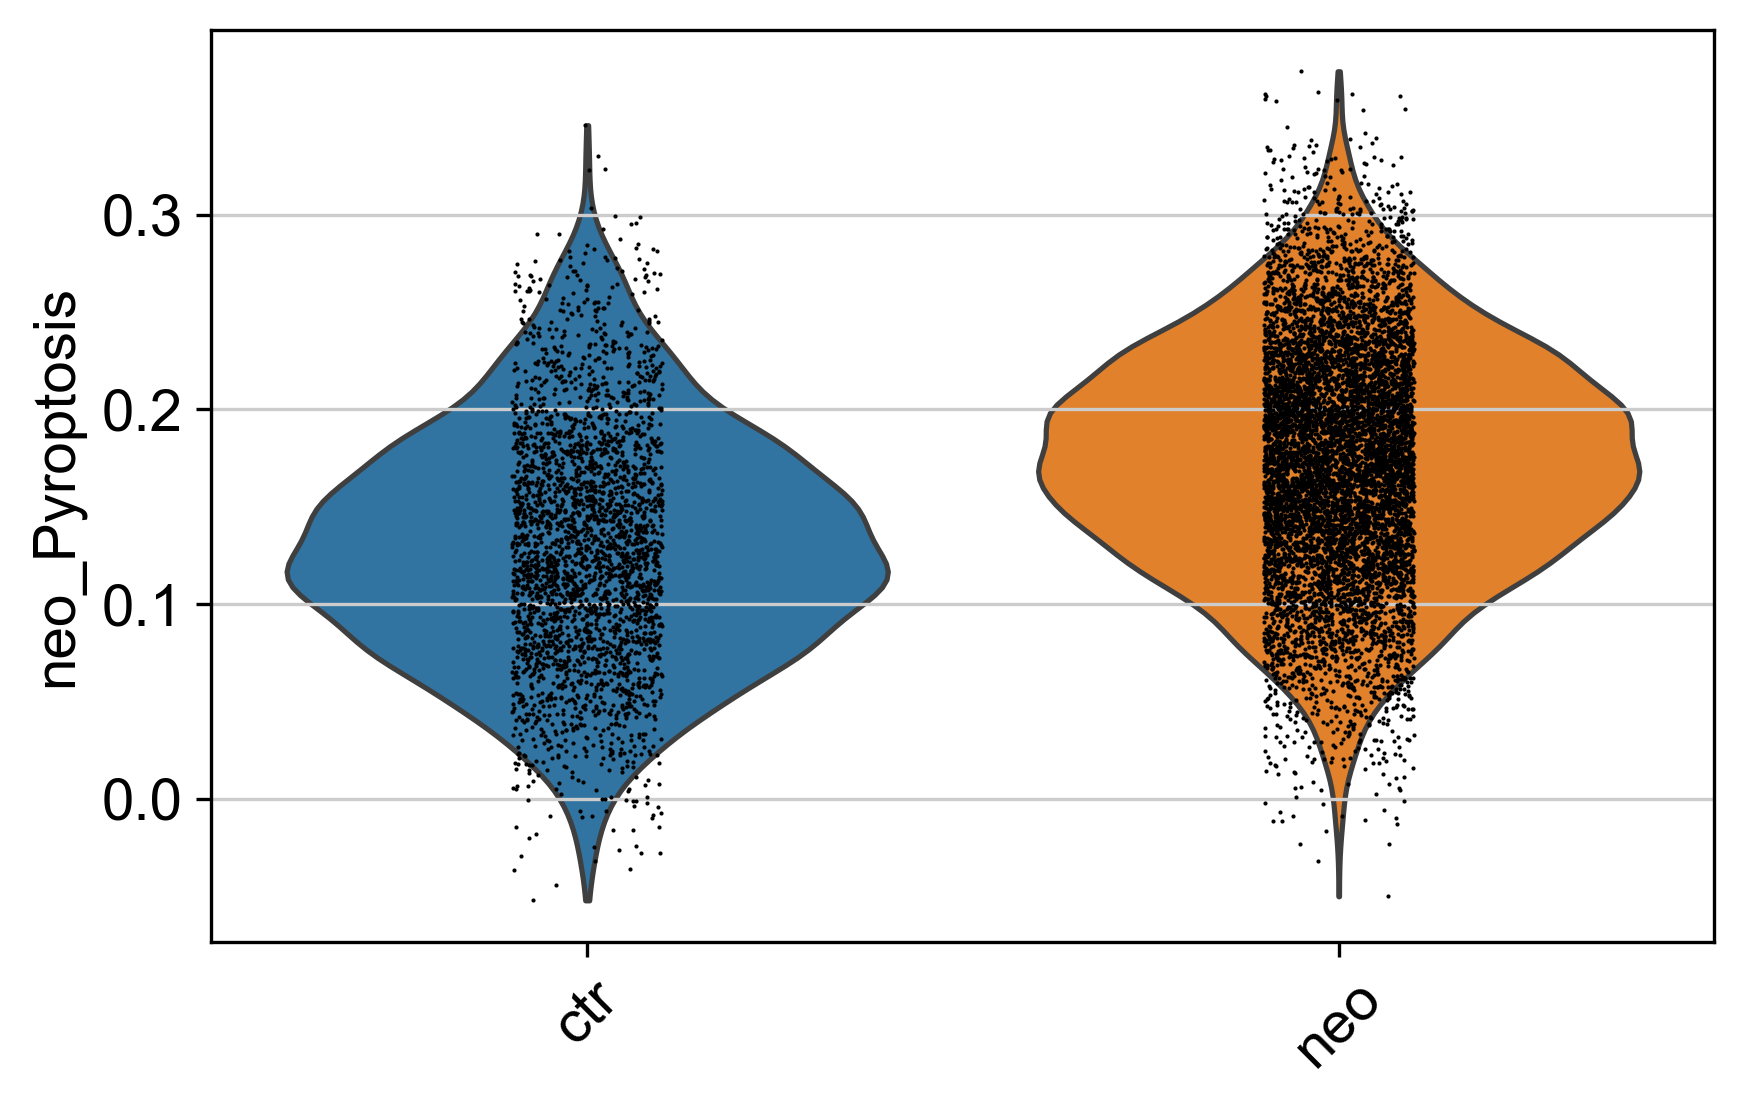

In [18]:
sc.set_figure_params(figsize=(6,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata_SV,['neo_Pyroptosis'],groupby='treatment',
             jitter=True,rotation=45,save='P21_SV_neo_Pyroptosis.pdf'
           )# stripplot


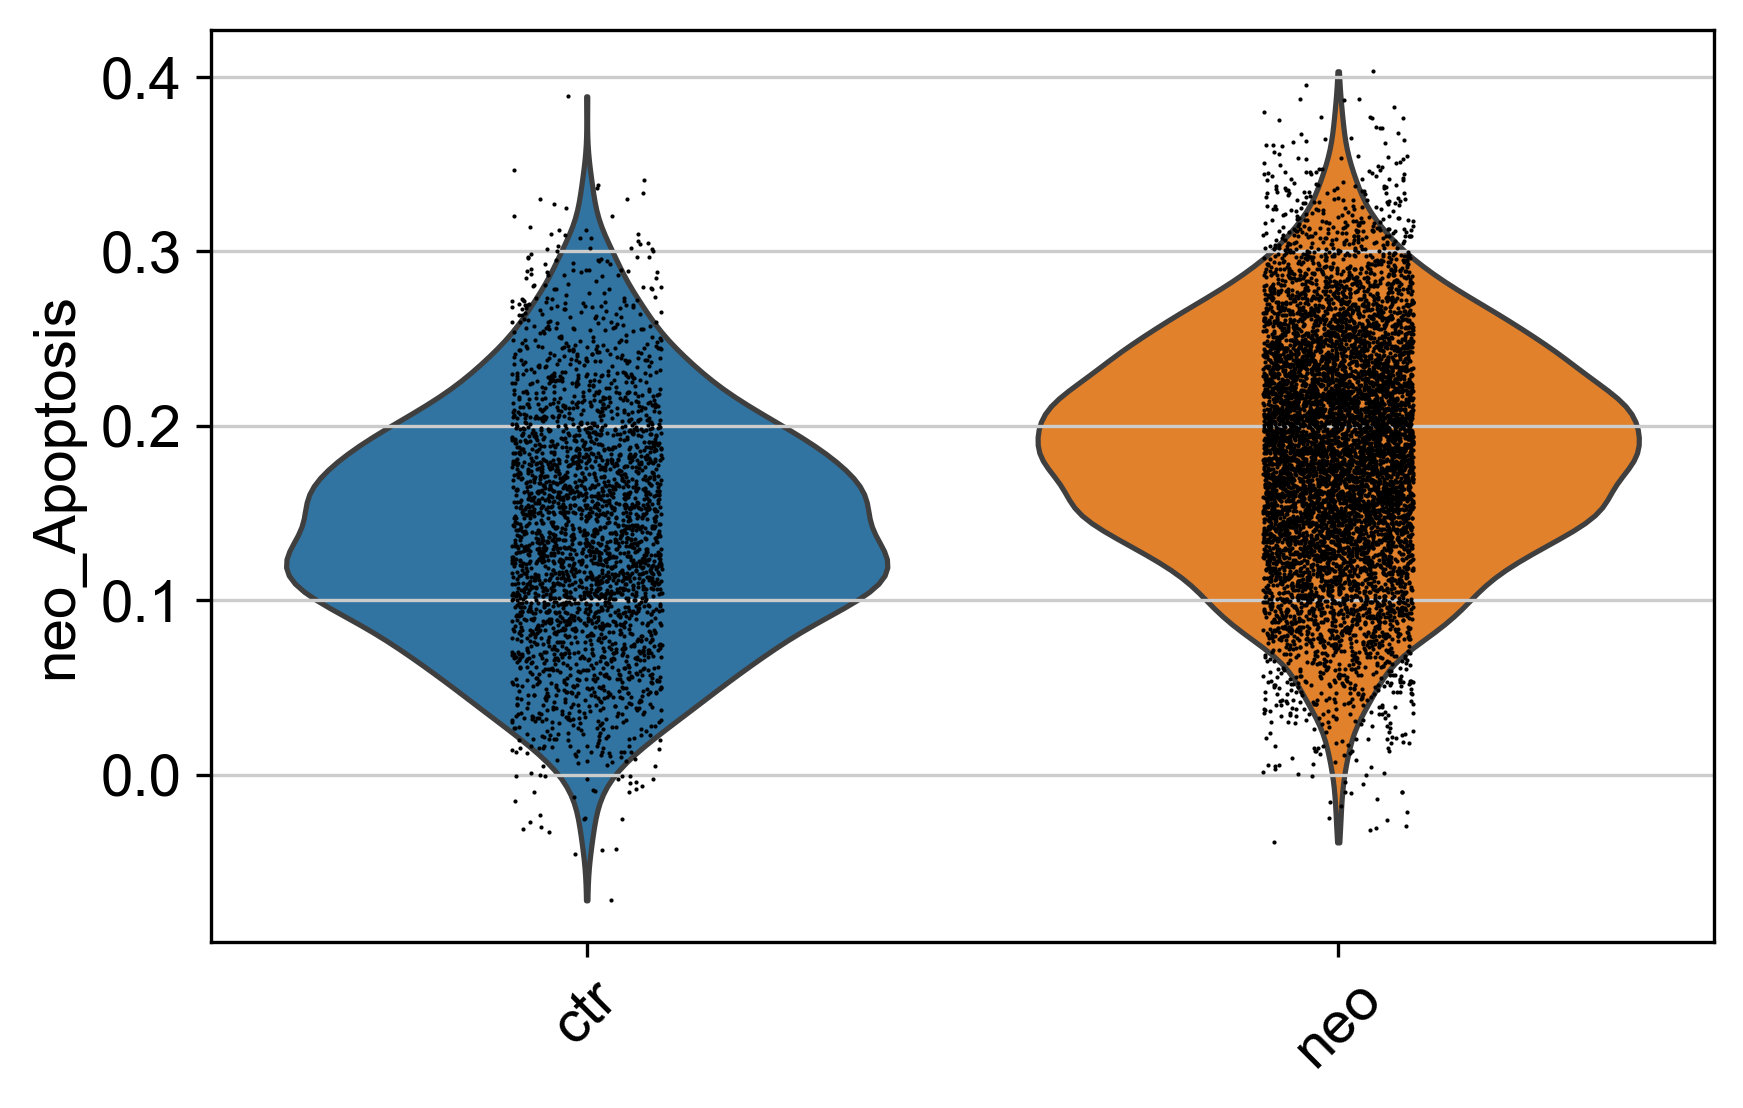

In [19]:
sc.set_figure_params(figsize=(6,4),frameon=False,dpi=150,dpi_save=600)
sc.pl.violin(adata_SV,['neo_Apoptosis'],groupby='treatment',
             jitter=True,rotation=45,save='P21_SV_neo_Apoptosis.pdf'
           )# stripplot

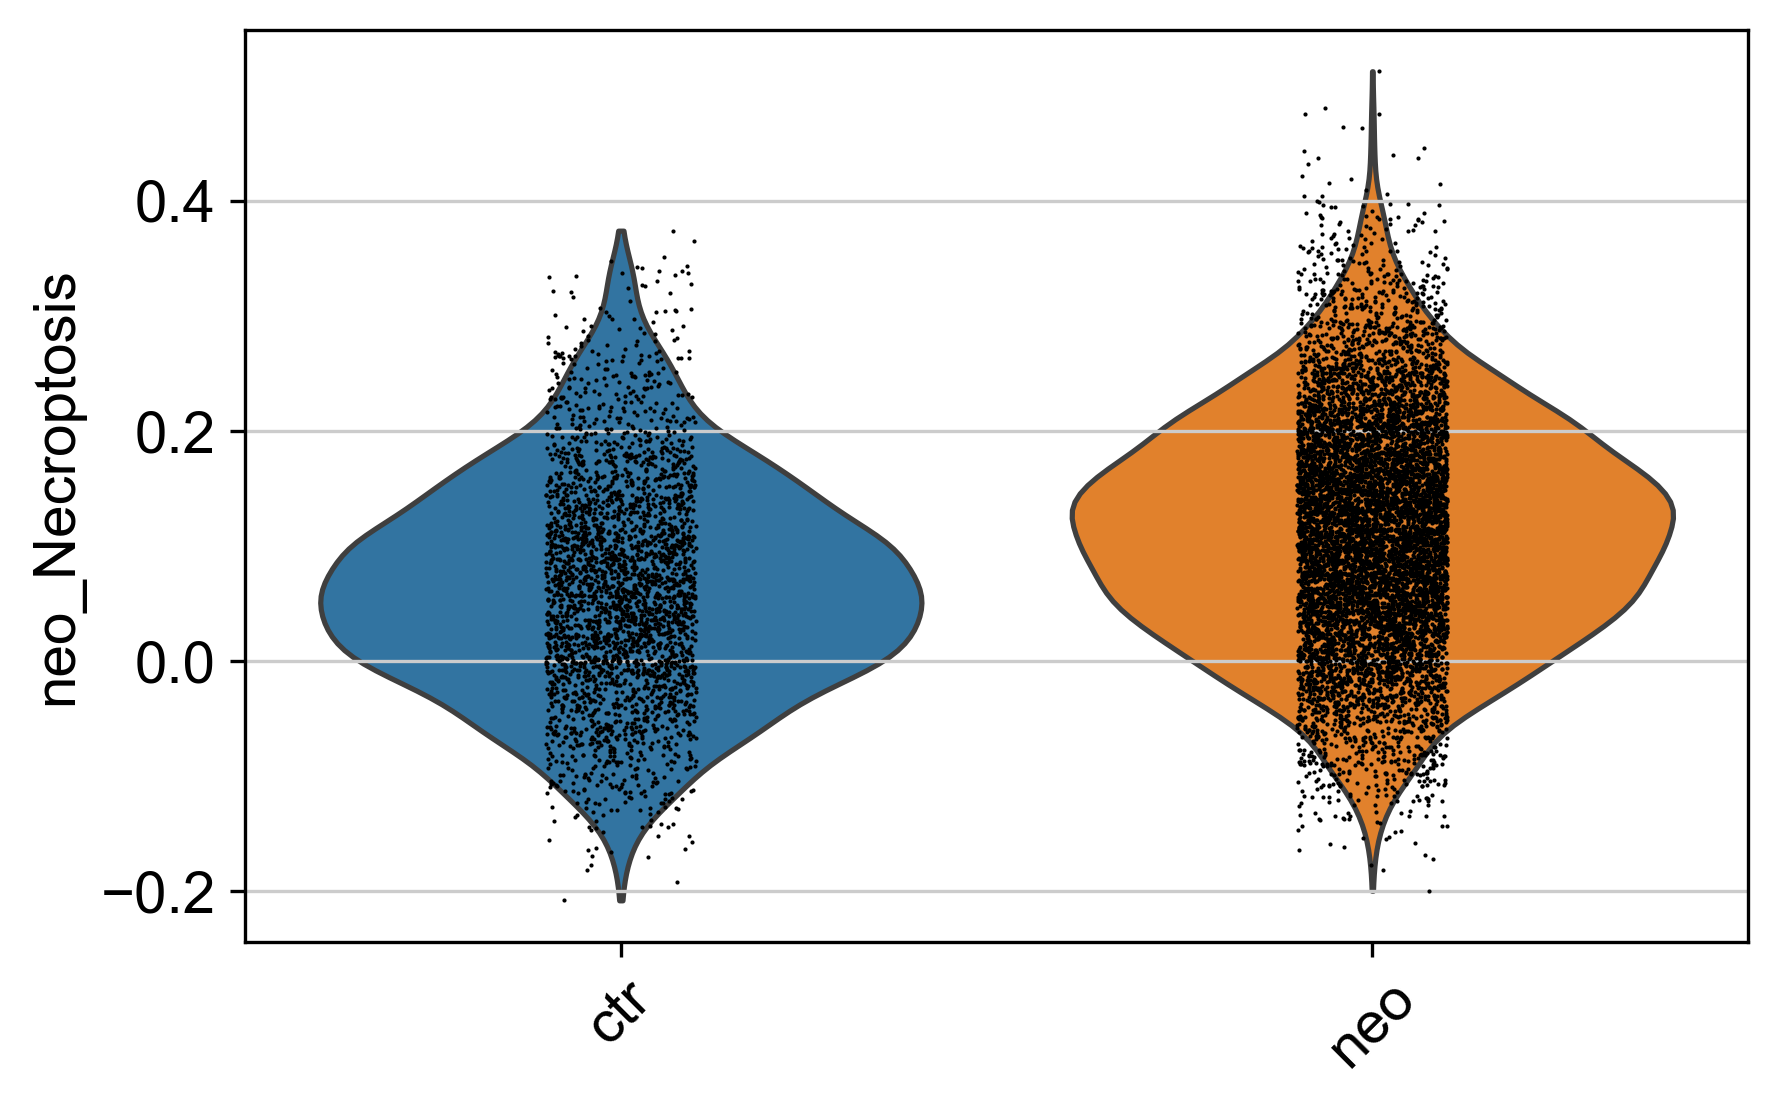

In [20]:
sc.set_figure_params(figsize=(6,4),frameon= False,dpi=150,dpi_save=600)
sc.pl.violin(adata_SV,['neo_Necroptosis'],groupby='treatment',jitter= True,
             rotation =45,save= 'P21_SV_neo_Necroptosis.pdf'
                   )

In [21]:
adata_SV_neo = adata_SV[adata_SV.obs['treatment']=='neo']
adata_SV_ctr = adata_SV[adata_SV.obs['treatment']=='ctr']

In [22]:
from scipy import stats
stats.ttest_ind(list(np.array(adata_SV_neo.obs['neo_Pyroptosis'])),list(np.array(adata_SV_ctr.obs['neo_Pyroptosis'])))

TtestResult(statistic=33.00970819963, pvalue=5.493478933141747e-228, df=11053.0)

In [23]:
stats.ttest_ind(list(np.array(adata_SV_neo.obs['neo_Apoptosis'])),list(np.array(adata_SV_ctr.obs['neo_Apoptosis'])))

TtestResult(statistic=31.60900105023656, pvalue=5.184593056447853e-210, df=11053.0)

In [24]:
stats.ttest_ind(list(np.array(adata_SV_neo.obs['neo_Necroptosis'])),list(np.array(adata_SV_ctr.obs['neo_Necroptosis'])))

TtestResult(statistic=22.519481226365375, pvalue=7.737048774760545e-110, df=11053.0)